In [1]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [9]:
conn = sqlite3.connect("fifa23_dashboard/data/fifa23.db")

In [3]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                           name
0                       players
1  players_fifa23_with_clusters
2                players_fifa23


In [4]:
query = """
SELECT player_id, "Value(in Euro)", "Wage(in Euro)" 
FROM players_fifa23
"""
df_cluster_id = pd.read_sql_query(query, conn)

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster_id[["Value(in Euro)", "Wage(in Euro)"]])

In [6]:
value_scaled = scaled_data[:, 0].reshape(-1, 1)
wage_scaled = scaled_data[:, 1].reshape(-1, 1)

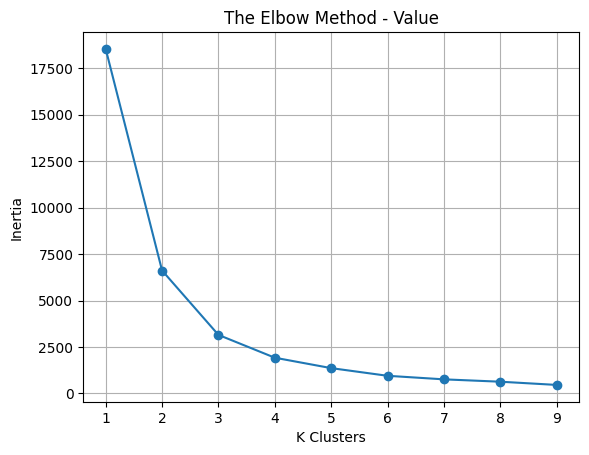

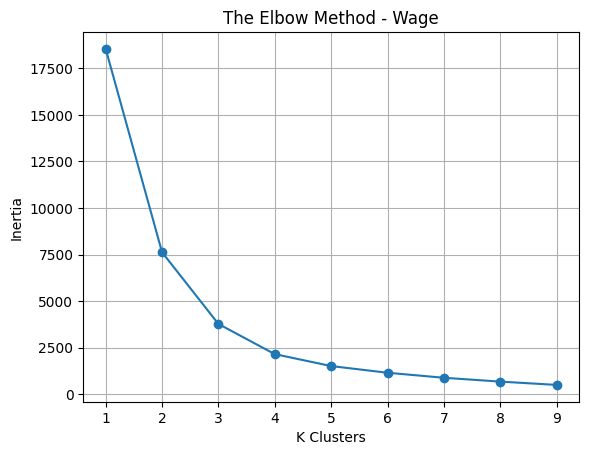

In [7]:
def plot_elbow(data, name):
    inertias = []
    for k in range(1, 10):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    plt.plot(range(1, 10), inertias, marker='o')
    plt.xlabel('K Clusters')
    plt.ylabel('Inertia')
    plt.title(f'The Elbow Method - {name}')
    plt.grid(True)
    plt.show()

plot_elbow(value_scaled, "Value")
plot_elbow(wage_scaled, "Wage")

In [9]:
# 5. Criar os modelos
kmeans_value = KMeans(n_clusters=4, random_state=42)
kmeans_wage = KMeans(n_clusters=4, random_state=42)

df_cluster_id['value_cluster'] = kmeans_value.fit_predict(value_scaled)
df_cluster_id['wage_cluster'] = kmeans_wage.fit_predict(wage_scaled)

In [10]:
value_order = df_cluster_id.groupby('value_cluster')["Value(in Euro)"].mean().sort_values().index
wage_order = df_cluster_id.groupby('wage_cluster')["Wage(in Euro)"].mean().sort_values().index

In [11]:
value_labels = {
    value_order[0]: 'Entry Level',
    value_order[1]: 'Budget Friendly',
    value_order[2]: 'Competitive Budget',
    value_order[3]: 'Premium Tier'
}

wage_labels = {
    wage_order[0]: 'Entry Level',
    wage_order[1]: 'Budget Friendly',
    wage_order[2]: 'Competitive Budget',
    wage_order[3]: 'Premium Tier'
}

df_cluster_id['value_cluster_label'] = df_cluster_id['value_cluster'].map(value_labels)
df_cluster_id['wage_cluster_label'] = df_cluster_id['wage_cluster'].map(wage_labels)

C:\Users\lpraz\AppData\Local\Temp\ipykernel_19144\2974322256.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Value(in Euro)', y='value_cluster', data=df_cluster_id, palette='viridis')


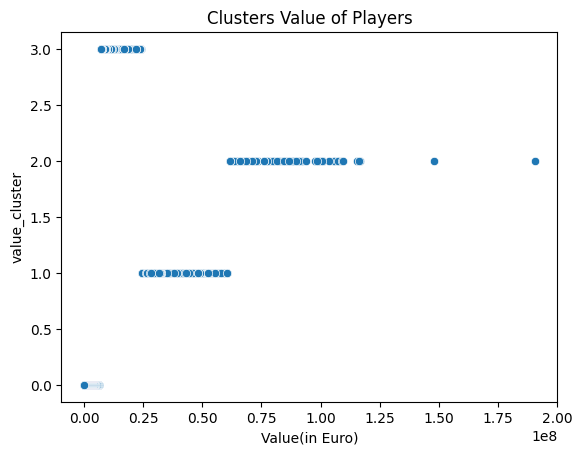

C:\Users\lpraz\AppData\Local\Temp\ipykernel_19144\2974322256.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Wage(in Euro)', y='wage_cluster', data=df_cluster_id, palette='coolwarm')


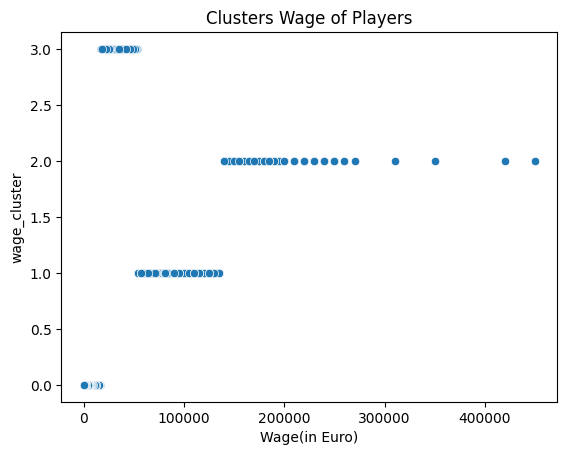

In [12]:
sns.scatterplot(x='Value(in Euro)', y='value_cluster', data=df_cluster_id, palette='viridis')
plt.title('Clusters Value of Players')
plt.show()

sns.scatterplot(x='Wage(in Euro)', y='wage_cluster', data=df_cluster_id, palette='coolwarm')
plt.title('Clusters Wage of Players')
plt.show()


In [13]:
df_cluster_id.groupby('value_cluster')['Value(in Euro)'].describe()

,count,mean,std,min,25%,50%,75%,max
value_cluster,,,,,,,,
0,17003.0,1.260994e+06,1.200973e+06,0.0,450000.0,875000.0,1600000.0,6500000.0
1,330.0,3.565606e+07,9.635486e+06,24500000.0,28000000.0,33000000.0,41000000.0,60500000.0
2,68.0,8.537500e+07,2.191527e+07,61500000.0,68500000.0,80750000.0,98125000.0,190500000.0
3,1138.0,1.256195e+07,4.680456e+06,7000000.0,8500000.0,11500000.0,16000000.0,24000000.0


In [14]:
df_cluster_id.groupby('wage_cluster')['Wage(in Euro)'].describe()

,count,mean,std,min,25%,50%,75%,max
wage_cluster,,,,,,,,
0,16035.0,3532.217025,3621.008869,0.0,950.0,2000.0,5000.0,16000.0
1,438.0,77952.054795,20136.717670,54000.0,62000.0,73000.0,90000.0,135000.0
2,81.0,197469.135802,55136.894730,140000.0,160000.0,185000.0,220000.0,450000.0
3,1985.0,28625.188917,9708.429279,17000.0,21000.0,26000.0,35000.0,53000.0


In [15]:
df_cluster_id

,player_id,Value(in Euro),Wage(in Euro),value_cluster,wage_cluster,value_cluster_label,wage_cluster_label
0,1,54000000,195000,1,2,Competitive Budget,Premium Tier
1,2,64000000,450000,2,2,Premium Tier,Premium Tier
2,3,84000000,420000,2,2,Premium Tier,Premium Tier
3,4,107500000,350000,2,2,Premium Tier,Premium Tier
4,5,190500000,230000,2,2,Premium Tier,Premium Tier
...,...,...,...,...,...,...,...
18534,18535,110000,500,0,0,Entry Level,Entry Level
18535,18536,90000,500,0,0,Entry Level,Entry Level
18536,18537,130000,500,0,0,Entry Level,Entry Level
18537,18538,100000,500,0,0,Entry Level,Entry Level


In [16]:
df_cluster_id.to_sql("players_fifa23_with_clusters", conn, if_exists="replace", index=False)

18539

In [17]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                           name
0                       players
1                players_fifa23
2  players_fifa23_with_clusters
